**Sentiment Analysis of Internationally Recognized Indian Movies**

This project will take us through the steps of analysing the sentiments of corpus of reviews of Indian movies that has been recognized internationally. We will try to find out the aspects that these movies contain that has been liked by the audience.


1. **Research Question**

 "What aspects do audiences appreciate the most in internationally recognized Indian movies?"

2. **Objectives**


*   To analyze the sentiment of reviews related to internationally recognized   Indian movies.
* To identify frequently occurring words in the review corpus.
To visualize sentiment distribution using bar charts and word clouds.



3. **Methodology**


*  
 Corpus Selection

 The review corpus consists of text reviews of Indian movies that have gained international recognition. The dataset includes reviews from various sources, ensuring a diverse representation of opinions.
*  
Sentiment Analysis

 The sentiment scores of reviews are calculated, categorizing them as positive or negative.

 A bar chart visualizes the sentiment distribution across different movies.






*  Frequent Word Analysis

 The most commonly used words in the reviews are extracted and analyzed.
 Stopwords are removed to focus on meaningful words that contribute to sentiment. The Word Cloud visualizes the most frequent words.

 Larger words appear more frequently in reviews.
Words like "movie," "characters," "film," "story," are prominently featured, indicating key discussion points in the reviews.

In [ ]:
# install libries
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.5 MB/s eta 0:00:00


Vader sentiment library in simple words is a special dictionary that helps the program understand the sentiment. Example- positive, negative

In [ ]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
from google.colab import files

# Ensure VADER lexicon is available
nltk.download('vader_lexicon')

# Upload the text corpus (multiple files)
print("Upload your text corpus files (.txt). You can upload multiple files.")
uploaded = files.upload()

# Initialize VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Create an empty list to store sentiment data for all documents
all_sentiments = []

# Process each uploaded file
for filename in uploaded.keys():
    # Read the corpus from each file
    with open(filename, 'r', encoding='utf-8') as f:
        text = f.readlines()

    # Analyze sentiment for the current file
    for line in text:
        if line.strip():  # Skip empty lines
            scores = sia.polarity_scores(line)
            all_sentiments.append({'document': filename,
                                   'neg': scores['neg'],
                                   'neu': scores['neu'],
                                   'pos': scores['pos'],
                                   })

# Convert all sentiments to DataFrame
df = pd.DataFrame(all_sentiments)

# Group by document and compute average sentiment scores
df_grouped = df.groupby("document", as_index=False).mean(numeric_only=True)

# Display the grouped data (only once)
print(df_grouped)

# Save grouped data to CSV
df_grouped.to_csv("sentiment_summary.csv", index=False)

Upload your text corpus files (.txt). You can upload multiple files.


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Saving MV1.txt to MV1 (2).txt
Saving MV2.txt to MV2 (2).txt
Saving MV3.txt to MV3 (2).txt
Saving MV4.txt to MV4 (2).txt
Saving MV5.txt to MV5 (2).txt
Saving MV6.txt to MV6 (2).txt
Saving MV7.txt to MV7 (2).txt
Saving MV8.txt to MV8 (2).txt
Saving MV9.txt to MV9 (2).txt
Saving MV10.txt to MV10 (2).txt
Saving MV11.txt to MV11 (2).txt
Saving MV12.txt to MV12 (2).txt
Saving MV13.txt to MV13 (2).txt
Saving MV14.txt to MV14 (2).txt
Saving MV15.txt to MV15 (2).txt
        document       neg       neu       pos
0    MV1 (2).txt  0.055783  0.831609  0.112696
1   MV10 (2).txt  0.062143  0.801286  0.136429
2   MV11 (2).txt  0.051500  0.816000  0.132500
3   MV12 (2).txt  0.017500  0.862000  0.120500
4   MV13 (2).txt  0.043600  0.804400  0.152000
5   MV14 (2).txt  0.093286  0.750429  0.156143
6   MV15 (2).txt  0.080750  0.818750  0.100250
7    MV2 (2).txt  0.053737  0.737000  0.209105
8    MV3 (2).txt  0.088818  0.778000  0.133091
9    MV4 (2).txt  0.040379  0.860897  0.098690
10   MV5 (2).txt  0.0

Now we will be uploading the text files creating a variable "uploaded" to help us upload multiple files at once. Afterwards setting up tools "sia" to check the emotion of each document. Now when the reviews are analysed we will have to store the results hence creating an empty list in a variable named "all sentiments". Followed up by reading each line and then checking the sentiment ignoring empty lines using "linestrip()".After converting the results into a table format (dataframe) we will calculate the sentiment of each file by using df.group and asking means in numeric. At last after showing the final result we save it in a csv file called "sentiment_summary.csv".

<ipython-input-17-f997b581888e>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="document", y="Score", hue="Sentiment", data=df_melted,ci=None)


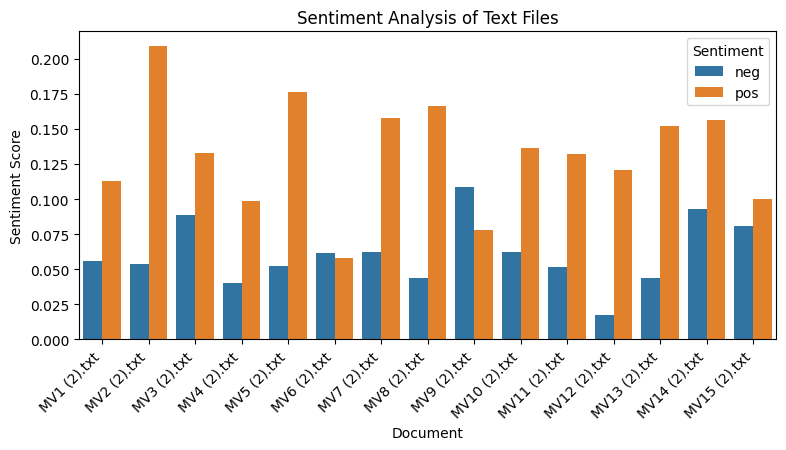

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reshape the DataFrame for visualization
df_melted = df.melt(id_vars=["document"], value_vars=["neg", "pos"],
                    var_name="Sentiment", value_name="Score")

# Create the bar plot without error bars
plt.figure(figsize=(9, 4))
sns.barplot(x="document", y="Score", hue="Sentiment", data=df_melted,ci=None)

# Formatting
plt.xticks(rotation=45, ha='right')
plt.xlabel("Document")
plt.ylabel("Sentiment Score")
plt.title("Sentiment Analysis of Text Files")
plt.legend(title="Sentiment")

# Show the plot
plt.show()

First we are importing the libraries."Matplotlib" helps to create graphs and charts and
seaborn makes charts look better and more readable.
Now reshaping the dataframe. The original df has separate columns for positive (pos) and negative (neg) sentiment scores.

Creating a bar chart with figure size of (9, 4) that contains x and y axis labeled as "documents" and "sentiment score" respectively. Furthermore hue="Sentiment" → Separates positive and negative scores using colors and
ci=None, removes error bars (which show uncertainty). At last formatting and displaying the chart.

In [ ]:
import nltk
from collections import Counter
from nltk.corpus import stopwords
from google.colab import files

# Ensure stopwords are available
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Add custom stopwords if needed
stop_words.update(["without", "must", "one", "any", "also", "use", "like","even","time","many","rap"])

# Upload files
print("Upload your text corpus files (.txt). You can upload multiple files.")
uploaded = files.upload()  # Ensure this runs successfully before proceeding

# Combine all text from uploaded files
all_text = ""

for filename in uploaded:
    with open(filename, 'r', encoding='utf-8') as f:
        all_text += " " + f.read().lower()  # Convert to lowercase

# Tokenize words and remove stopwords
words = [word for word in all_text.split() if word.isalpha() and word not in stop_words]

# Get word frequencies
word_freq = Counter(words)

# Display the top 10 most frequent words
print("Top 10 Most Frequent Words:")
for word, freq in word_freq.most_common(20):
    print(f"{word}: {freq}")

Upload your text corpus files (.txt). You can upload multiple files.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Saving MV1.txt to MV1 (2).txt
Saving MV2.txt to MV2 (2).txt
Saving MV3.txt to MV3 (2).txt
Saving MV4.txt to MV4 (2).txt
Saving MV5.txt to MV5 (2).txt
Saving MV6.txt to MV6 (2).txt
Saving MV7.txt to MV7 (2).txt
Saving MV8.txt to MV8 (2).txt
Saving MV9.txt to MV9 (2).txt
Saving MV10.txt to MV10 (2).txt
Saving MV11.txt to MV11 (2).txt
Saving MV12.txt to MV12 (2).txt
Saving MV13.txt to MV13 (2).txt
Saving MV14.txt to MV14 (2).txt
Saving MV15.txt to MV15 (2).txt
Top 10 Most Frequent Words:
film: 38
movie: 32
characters: 17
people: 17
story: 16
first: 14
indian: 13
ranveer: 13
would: 12
young: 12
music: 12
character: 11
good: 11
two: 11
singh: 11
every: 10
could: 10
see: 10
gets: 9
girl: 9


Importing packages:
Counter (from collections) is used to count word occurrences.

Stopwords helps remove common words like "the," "is," "and."

Files (from google.colab) allows uploading files in Google Colab

Now moving into the code. Download a list of common English stopwordsand then converting  it into a set for faster lookups.

Add Custom Stopwords
Adds extra words to remove, which may not be useful, using "stop_words.update"

Now again using our earlier used variable "uploaded" we will try to upload the files once again

Read and combine all the text documents together using a for loop. First reading the files and then adding another file with it. This will go on it all the files are read and combined

Break text into individual words, tokenizing words. Followed by
Removing stopwords (like "the", "is", etc.).
Now counting how many times each word has appeared that is frequency of words. Using
word_freq = Counter(words)

Atlast,we are taking top 20 words and printing them with their frequency

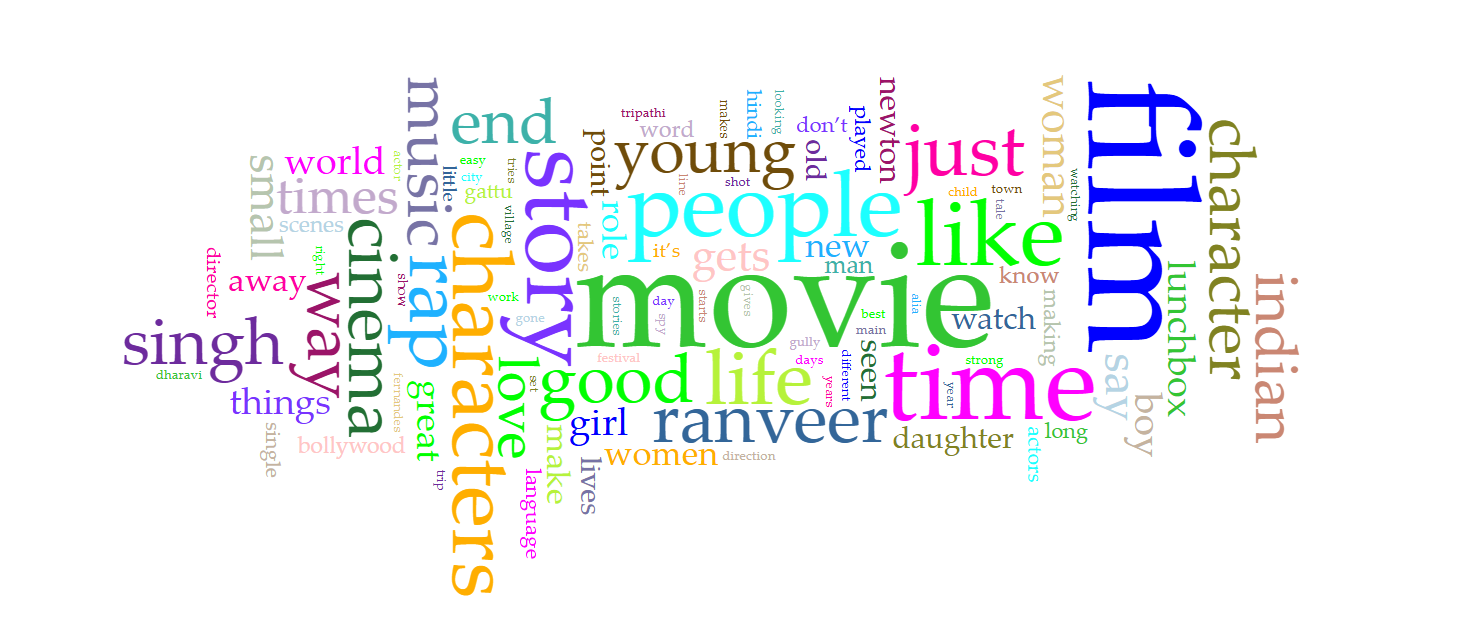

**Interpretation of Results**

Sentiment analysis

The sentiment analysis shows that most movies have a higher positive sentiment, as indicated by the dominance of orange bars.

The word cloud reveals that audience discussions focus on characters, storylines, and specific actors like Ranveer Singh.

The presence of words like "great," "strong," "good," and "cinema" suggests that audiences appreciate the artistic and narrative aspects of movie.

Frequency of words

Words like "characters" (17), "character" (11), and "story" (16) suggest that audiences deeply engage with the narrative and character development of these films.

Words like "people" (17), "young" (12), and "girl" (9) may indicate that audience discussions often relate to themes of youth, relationships, or societal aspects reflected in the films.

The frequency of "music" (12) suggests that soundtracks and background scores are a significant aspect of audience discussion and appreciation